Alex Sewon Kim 26481817

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as pp
import statsmodels . api as sm
import seaborn as sns
import math
import itertools

In [3]:
data = "/Users/Alex/Desktop/Research/SAT/created_data/"
df = pd.read_csv("/Users/Alex/Desktop/econ_c142/Brazil_1996PNAD.out.txt", \
na_values="", engine="c", sep = "\t", encoding = "utf−8")
df=df[df.MONTHLY_EARNINGS!=0]
lnMONTHLY_EARNINGS = np.log(df['MONTHLY_EARNINGS'])
df['lMONTHLY_EARNINGS']=lnMONTHLY_EARNINGS
df['constant']= 1
AgeInDays_sq = df['AgeInDays']**2
df['AgeInDays_sq']=AgeInDays_sq

df = df[df['MONTHLY_EARNINGS']!=0]
df=df[(df['AgeInDays']>=20)&(df['AgeInDays']<=60)]


In [6]:
df.describe()

,AgeInDays,YRSSCH,MONTHLY_EARNINGS,Father_NoSchool,Father_Incomplete1stPrimary,Father_Complete1stPrimary,Father_Incomplete2ndPrimary,Father_Complete2ndPrimary,Father_IncompleteSecondary,Father_CompleteSecondary,...,Mother_Incomplete2ndPrimary,Mother_Complete2ndPrimary,Mother_IncompleteSecondary,Mother_CompleteSecondary,Mother_IncompleteHigher,Mother_CompleteHigher,Mother_DontKnow,lMONTHLY_EARNINGS,constant,AgeInDays_sq
count,55551.000000,55551.000000,55551.000000,55551.000000,55551.000000,55551.000000,55551.000000,55551.000000,55551.000000,55551.000000,...,55551.000000,55551.000000,55551.000000,55551.000000,55551.000000,55551.000000,55551.000000,55551.000000,55551.0,55551.000000
mean,37.055054,5.830462,634.184245,0.282569,0.205037,0.139691,0.034311,0.054832,0.051808,0.039531,...,0.041493,0.065093,0.032691,0.045148,0.016921,0.054760,0.084553,5.867646,1.0,1478.384264
std,10.262022,4.217958,1104.788945,0.450253,0.403732,0.346670,0.182028,0.227655,0.221642,0.194857,...,0.199430,0.246693,0.177827,0.207630,0.128978,0.227514,0.278218,1.008420,0.0,798.260874
min,20.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.386294,1.0,400.000000
25%,28.607800,3.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.192957,1.0,818.406221
50%,36.188910,5.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.768321,1.0,1309.637207
75%,44.681720,8.000000,602.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.400257,1.0,1996.456102
max,60.000000,15.000000,50000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.819778,1.0,3600.000000


Computing least square fit 

In [9]:
Y = df[['lMONTHLY_EARNINGS']]
X = df[['constant','YRSSCH','AgeInDays','AgeInDays_sq']]
result = sm.OLS(Y,X).fit(cov_type="HC0")
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      lMONTHLY_EARNINGS   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                 1.246e+04
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        18:24:45   Log-Likelihood:                -64169.
No. Observations:               55551   AIC:                         1.283e+05
Df Residuals:                   55547   BIC:                         1.284e+05
Df Model:                           3                                         
Covariance Type:                  HC0                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
constant         3.0446      0.042     73.073      0.000       2.963       3.126
YRSSCH           0.1456      0.001    177.126      0.000       0.144       0.147
AgeInDays        0.0893      0.002     38.157      0.000       0.085       0.094
AgeInDays_sq    -0.0009   3.08e-05    -29.328      0.000      -0.001      -0.001
==============================================================================
Omnibus:                     1093.941   Durbin-Watson:                   1.593
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2208.935
Skew:                           0.094   Prob(JB):                         0.00
Kurtosis:                       3.959   Cond. No.                     2.23e+04
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 2.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

b) Create a dummy variable for each of the 16 possible schooling levels. Compute the least squares fit of
ln(MONTHLY_EARNINGS) onto each of the 16 dummy variables, AgeInDays, and AgeInDays squared (exclude
a constant from this regression)

In [10]:
yearschool=sorted(df['YRSSCH'].unique())
dums=pd.get_dummies(df['YRSSCH'].astype('category'),prefix='y')
df=pd.concat([df,dums],axis=1)

In [11]:
X1=df[['AgeInDays','AgeInDays_sq']]
X1=pd.concat([X1, df.loc[:,'y_' + str(yearschool[0]):
                      'y_' + str(yearschool[-1])]], axis=1)

In [12]:
result1=sm.OLS(Y,X1).fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      lMONTHLY_EARNINGS   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     2450.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        18:25:15   Log-Likelihood:                -63744.
No. Observations:               55551   AIC:                         1.275e+05
Df Residuals:                   55533   BIC:                         1.277e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
AgeInDays        0.0857      0.002     36.322      0.000       0.081       0.090
AgeInDays_sq    -0.0009   3.03e-05    -29.048      0.000      -0.001      -0.001
y_0              3.1419      0.044     71.086      0.000       3.055       3.229
y_1              3.3427      0.047     70.731      0.000       3.250       3.435
y_2              3.4790      0.045     76.498      0.000       3.390       3.568
y_3              3.6095      0.045     80.449      0.000       3.522       3.697
y_4              3.8035      0.044     85.721      0.000       3.716       3.890
y_5              3.8891      0.044     87.834      0.000       3.802       3.976
y_6              3.9774      0.045     88.204      0.000       3.889       4.066
y_7              4.0540      0.045     89.826      0.000       3.966       4.142
y_8              4.1998      0.044     94.442      0.000       4.113       4.287
y_9              4.2730      0.049     87.704      0.000       4.178       4.369
y_10             4.3863      0.048     92.090      0.000       4.293       4.480
y_11             4.6878      0.046    102.731      0.000       4.598       4.777
y_12             4.9359      0.058     84.676      0.000       4.822       5.050
y_13             5.0787      0.058     86.993      0.000       4.964       5.193
y_14             5.1796      0.058     89.676      0.000       5.066       5.293
y_15             5.5789      0.047    119.156      0.000       5.487       5.671
==============================================================================
Omnibus:                     1197.054   Durbin-Watson:                   1.600
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2510.859
Skew:                           0.098   Prob(JB):                         0.00
Kurtosis:                       4.023   Cond. No.                     9.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

c)Plotting the regression fits in [a] and [b] on the same figure holding AgeInDays fixed at 40, but varying
YRSSCH.

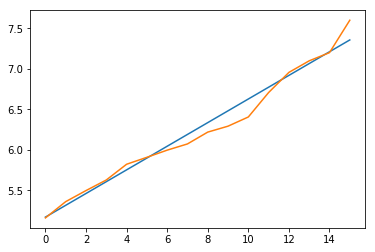

In [13]:
bin1 = np.arange(0,16)
Result_eq = result.params['constant']+result.params['AgeInDays']*40+result.params['AgeInDays_sq']*(40**2)+ result.params['YRSSCH']*bin1


Result1_eq = np.zeros(bin1.shape)  
for i, education in enumerate(bin1): 
    Result1_eq[i] = result1.params['AgeInDays']*40+result1.params['AgeInDays_sq']*(40**2)+result1.params[2+i]
pp.plot(bin1,Result_eq)
pp.plot(bin1,Result1_eq)
pp.show()

d) Constructing two histograms. One each for the distribution of the logarithm of monthly earnings given
YRSSCH = 0 and YRSSCH = 8. Comment on any differences

In [14]:
YRSSCH_0 = df[df['YRSSCH']==0]
Hist0 = np.log(YRSSCH_0['MONTHLY_EARNINGS'])

YRSSCH_8 = df[df['YRSSCH']==8]
Hist8 = np.log(YRSSCH_8['MONTHLY_EARNINGS'])

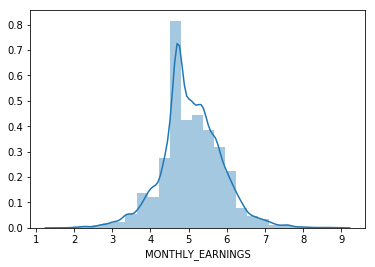

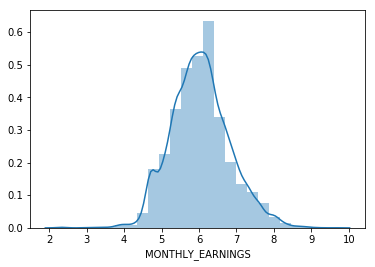

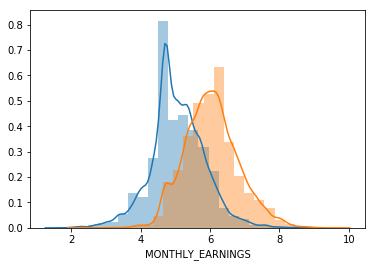

In [9]:

sns.distplot(Hist0,25) 
pp.show()

sns.distplot(Hist8,25) 
pp.show()

sns.distplot(Hist0,25) 
sns.distplot(Hist8,25)
pp.show()

e) Consider the following L = 8 age ranges: [20, 25), [25, 30), [30, 35), [35, 40), [40, 45), [45, 50), [50, 55), [55, 60] .
Let K = 16 be the number of distinct schooling values. For each of the K × L = 8 × 16 = 128 years of
schooling and age range combinations with at least 30 observations in the dataset estimate the 10th, 25th,
50th, 75th and 90th quantiles of the distribution of log earnings. For each conditional quantile construct a
confidence interval using order statistics as described in lecture. Using this confidence interval construct a
standard error estimate.

In [10]:
for j in range(8):  
    df['d%i' %j] = (df['AgeInDays']>=(20+5*j)) & (df['AgeInDays']<(20+5*(j+1)))
    if j==7:
        df['d%i' %j] = (df['AgeInDays']>=(20+5*j)) & (df['AgeInDays']<=(20+5*(j+1)))
    df['d%i' %j] = df['d%i' %j].astype(int)

    

In [11]:
dummy_list = ['d%i' %j for j in range(8)]
yearschool = ['y_%i' %j for j in range(16)]

In [12]:
order = [] 
totalcount = []
age=[]
lower=[]
upper=[]
se=[]
school=[]
for i,j in itertools.product(dummy_list,yearschool):
    k=0.10
    group = df[(df[i]==1)&(df[j]==1)]
    group = group.sort_values('lMONTHLY_EARNINGS')
    group = group.reset_index()
    count = group['lMONTHLY_EARNINGS'].count()
    h=int(i[1:])
    if count>=30:
        order = order + [(group.loc[math.floor(k*(count+1)),'lMONTHLY_EARNINGS']+group.loc[math.ceil(k*(count+1)),'lMONTHLY_EARNINGS'])/2]
        totalcount = totalcount + [group['lMONTHLY_EARNINGS'].count()]
        age = age + [(20+5*h+20+5*(h+1))/2] 
        school = school + [int(j[2:])]
        a=max(math.floor(count*k-math.sqrt(count*k*(1-k))*1.96)-1,0)
        b=min(math.ceil(count*k+math.sqrt(count*k*(1-k))*1.96)-1,count-1)
        lower = lower + [group.loc[a,'lMONTHLY_EARNINGS']]
        upper = upper + [group.loc[b,'lMONTHLY_EARNINGS']]
        se=se + [math.sqrt(count)*(group.loc[b,'lMONTHLY_EARNINGS']-group.loc[a,'lMONTHLY_EARNINGS'])/(2*1.96)]
order = np.array(order) 
age = np.array(age)
agesq=[a*a for a in age]
df_10=pd.DataFrame({'logearnings':order,'se':se,'lower':lower,'upper':upper,'age':age,'agesq':agesq,'school':school,'count':totalcount})
df_10

,age,agesq,count,logearnings,lower,school,se,upper
0,22.5,506.25,758,3.912023,3.871201,0,1.567231,4.094345
1,22.5,506.25,202,4.094345,3.806662,1,1.601945,4.248495
2,22.5,506.25,408,4.499810,4.382027,2,1.149816,4.605170
3,22.5,506.25,632,4.605170,4.382027,3,1.431057,4.605170
4,22.5,506.25,1145,4.605170,4.605170,4,0.822727,4.700480
5,22.5,506.25,1088,4.718499,4.718499,5,0.000000,4.718499
6,22.5,506.25,733,4.718499,4.718499,6,0.000000,4.718499
7,22.5,506.25,721,4.718499,4.718499,7,0.000000,4.718499
8,22.5,506.25,1123,4.787492,4.718499,8,1.274071,4.867534
9,22.5,506.25,255,4.851908,4.718499,9,1.135382,4.997212


In [13]:
order = [] 
totalcount = []
age=[]
lower=[]
upper=[]
se=[]
school=[]
for i,j in itertools.product(dummy_list,yearschool):
    k=0.25
    group = df[(df[i]==1)&(df[j]==1)]
    group = group.sort_values('lMONTHLY_EARNINGS')
    group = group.reset_index()
    count = group['lMONTHLY_EARNINGS'].count()
    h=int(i[1:])
    if count>=30:
        order = order + [(group.loc[math.floor(k*(count+1)),'lMONTHLY_EARNINGS']+group.loc[math.ceil(k*(count+1)),'lMONTHLY_EARNINGS'])/2]
        totalcount = totalcount + [group['lMONTHLY_EARNINGS'].count()]
        age = age + [(20+5*h+20+5*(h+1))/2] 
        school = school + [int(j[2:])]
        a=max(math.floor(count*k-math.sqrt(count*k*(1-k))*1.96)-1,0)
        b=min(math.ceil(count*k+math.sqrt(count*k*(1-k))*1.96)-1,count-1)
        lower = lower + [group.loc[a,'lMONTHLY_EARNINGS']]
        upper = upper + [group.loc[b,'lMONTHLY_EARNINGS']]
        se=se + [math.sqrt(count)*(group.loc[b,'lMONTHLY_EARNINGS']-group.loc[a,'lMONTHLY_EARNINGS'])/(2*1.96)]
order = np.array(order) 
age = np.array(age)
agesq=[a*a for a in age]
df_25=pd.DataFrame({'logearnings':order,'se':se,'lower':lower,'upper':upper,'age':age,'agesq':agesq,'school':school,'count':totalcount})
df_25

,age,agesq,count,logearnings,lower,school,se,upper
0,22.5,506.25,758,4.442651,4.382027,0,1.567231,4.605170
1,22.5,506.25,202,4.605170,4.382027,1,0.809047,4.605170
2,22.5,506.25,408,4.718499,4.700480,2,0.092846,4.718499
3,22.5,506.25,632,4.718499,4.718499,3,0.000000,4.718499
4,22.5,506.25,1145,4.787492,4.718499,4,0.595554,4.787492
5,22.5,506.25,1088,4.941642,4.787492,5,1.877642,5.010635
6,22.5,506.25,733,5.010635,4.912655,6,1.122457,5.075174
7,22.5,506.25,721,5.010635,5.010635,7,0.442080,5.075174
8,22.5,506.25,1123,5.247024,5.192957,8,0.900703,5.298317
9,22.5,506.25,255,5.192957,5.135798,9,0.662046,5.298317


In [14]:
order = [] 
totalcount = []
age=[]
lower=[]
upper=[]
se=[]
school=[]
for i,j in itertools.product(dummy_list,yearschool):
    k=0.50
    group = df[(df[i]==1)&(df[j]==1)]
    group = group.sort_values('lMONTHLY_EARNINGS')
    group = group.reset_index()
    count = group['lMONTHLY_EARNINGS'].count()
    h=int(i[1:])
    if count>=30:
        order = order + [(group.loc[math.floor(k*(count+1))-1,'lMONTHLY_EARNINGS']+group.loc[math.ceil(k*(count+1))-1,'lMONTHLY_EARNINGS'])/2]
        totalcount = totalcount + [group['lMONTHLY_EARNINGS'].count()]
        age = age + [(20+5*h+20+5*(h+1))/2] 
        school = school + [int(j[2:])]
        a=max(math.floor(count*k-math.sqrt(count*k*(1-k))*1.96-1),0)
        b=min(math.ceil(count*k+math.sqrt(count*k*(1-k))*1.96-1),count-1)
        lower = lower + [group.loc[a,'lMONTHLY_EARNINGS']]
        upper = upper + [group.loc[b,'lMONTHLY_EARNINGS']]
        se=se + [math.sqrt(count)*(group.loc[b,'lMONTHLY_EARNINGS']-group.loc[a,'lMONTHLY_EARNINGS'])/(2*1.96)]
order = np.array(order) 
age = np.array(age)
agesq=[a*a for a in age]
df_50=pd.DataFrame({'logearnings':order,'se':se,'lower':lower,'upper':upper,'age':age,'agesq':agesq,'school':school,'count':totalcount})
df_50

,age,agesq,count,logearnings,lower,school,se,upper
0,22.5,506.25,758,4.787492,4.718499,0,0.484566,4.787492
1,22.5,506.25,202,4.864567,4.718499,1,1.059194,5.010635
2,22.5,506.25,408,5.075174,5.010635,2,0.583961,5.123964
3,22.5,506.25,632,5.123964,5.043425,3,0.851185,5.176150
4,22.5,506.25,1145,5.278115,5.192957,4,0.909483,5.298317
5,22.5,506.25,1088,5.298317,5.298317,5,0.801988,5.393628
6,22.5,506.25,733,5.411646,5.313206,6,1.156397,5.480639
7,22.5,506.25,721,5.411646,5.411646,7,0.472591,5.480639
8,22.5,506.25,1123,5.703782,5.634790,8,0.589804,5.703782
9,22.5,506.25,255,5.703782,5.648974,9,0.851226,5.857933


In [15]:
order = [] 
totalcount = []
age=[]
lower=[]
upper=[]
se=[]
school=[]
for i,j in itertools.product(dummy_list,yearschool):
    k=0.75
    group = df[(df[i]==1)&(df[j]==1)]
    group = group.sort_values('lMONTHLY_EARNINGS')
    group = group.reset_index()
    count = group['lMONTHLY_EARNINGS'].count()
    h=int(i[1:])
    if count>=30:
        order = order + [(group.loc[math.floor(k*(count+1)),'lMONTHLY_EARNINGS']+group.loc[math.ceil(k*(count+1)),'lMONTHLY_EARNINGS'])/2]
        totalcount = totalcount + [group['lMONTHLY_EARNINGS'].count()]
        age = age + [(20+5*h+20+5*(h+1))/2] 
        school = school + [int(j[2:])]
        a=max(math.floor(count*k-math.sqrt(count*k*(1-k))*1.96-1),0)
        b=min(math.ceil(count*k+math.sqrt(count*k*(1-k))*1.96-1),count-1)
        lower = lower + [group.loc[a,'lMONTHLY_EARNINGS']]
        upper = upper + [group.loc[b,'lMONTHLY_EARNINGS']]
        se=se + [math.sqrt(count)*(group.loc[b,'lMONTHLY_EARNINGS']-group.loc[a,'lMONTHLY_EARNINGS'])/(2*1.96)]
order = np.array(order) 
age = np.array(age)
agesq=[a*a for a in age]
df_75=pd.DataFrame({'logearnings':order,'se':se,'lower':lower,'upper':upper,'age':age,'agesq':agesq,'school':school,'count':totalcount})
df_75

,age,agesq,count,logearnings,lower,school,se,upper
0,22.5,506.25,758,5.298317,5.298317,0,0.000000,5.298317
1,22.5,506.25,202,5.411646,5.192957,1,1.333253,5.560682
2,22.5,506.25,408,5.411646,5.298317,2,1.149816,5.521461
3,22.5,506.25,632,5.480639,5.411646,3,0.704261,5.521461
4,22.5,506.25,1145,5.648974,5.634790,4,0.595554,5.703782
5,22.5,506.25,1088,5.703782,5.703782,5,0.673519,5.783825
6,22.5,506.25,733,5.783707,5.703782,6,1.064661,5.857933
7,22.5,506.25,721,5.857933,5.817111,7,0.842944,5.940171
8,22.5,506.25,1123,6.040255,5.991465,8,1.006900,6.109248
9,22.5,506.25,255,6.173786,6.040255,9,1.098516,6.309918


In [16]:
order = [] 
totalcount = []
age=[]
lower=[]
upper=[]
se=[]
school=[]
for i,j in itertools.product(dummy_list,yearschool):
    k=0.90
    group = df[(df[i]==1)&(df[j]==1)]
    group = group.sort_values('lMONTHLY_EARNINGS')
    group = group.reset_index()
    count = group['lMONTHLY_EARNINGS'].count()
    h=int(i[1:])
    if count>=30:
        order = order + [(group.loc[math.floor(k*(count+1)),'lMONTHLY_EARNINGS']+group.loc[math.ceil(k*(count+1)),'lMONTHLY_EARNINGS'])/2]
        totalcount = totalcount + [group['lMONTHLY_EARNINGS'].count()]
        age = age + [(20+5*h+20+5*(h+1))/2] 
        school = school + [int(j[2:])]
        a=max(math.floor(count*k-math.sqrt(count*k*(1-k))*1.96)-1,0)
        b=min(math.ceil(count*k+math.sqrt(count*k*(1-k))*1.96)-1,count-1)
        lower = lower + [group.loc[a,'lMONTHLY_EARNINGS']]
        upper = upper + [group.loc[b,'lMONTHLY_EARNINGS']]
        se=se + [math.sqrt(count)*(group.loc[b,'lMONTHLY_EARNINGS']-group.loc[a,'lMONTHLY_EARNINGS'])/(2*1.96)]
order = np.array(order) 
age = np.array(age)
agesq=[a*a for a in age]
df_90=pd.DataFrame({'logearnings':order,'se':se,'lower':lower,'upper':upper,'age':age,'agesq':agesq,'school':school,'count':totalcount})
df_90

,age,agesq,count,logearnings,lower,school,se,upper
0,22.5,506.25,758,5.703782,5.521461,0,1.733802,5.768321
1,22.5,506.25,202,5.857933,5.703782,1,1.852091,6.214608
2,22.5,506.25,408,5.708758,5.669881,2,0.968997,5.857933
3,22.5,506.25,632,5.857933,5.768321,3,1.102104,5.940171
4,22.5,506.25,1145,5.991465,5.991465,4,0.421162,6.040255
5,22.5,506.25,1088,6.173786,6.040255,5,1.467097,6.214608
6,22.5,506.25,733,6.214608,6.068426,6,1.642739,6.306275
7,22.5,506.25,721,6.309918,6.214608,7,1.248877,6.396930
8,22.5,506.25,1123,6.476972,6.396930,8,1.317799,6.551080
9,22.5,506.25,255,6.652342,6.396930,9,1.370671,6.733402


f) Inspect standard error estimates. Are any of them are zero. Why? Inspect the distribution of
MONTHLY_EARNINGS. Is MONTHLY_EARNINGS a continuously-valued random variable? Relate what you find to
the phenomena of standard error estimates of zero.

In [17]:
df_10.describe()

,age,agesq,count,logearnings,lower,school,se,upper
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,39.267241,1659.698276,477.146552,5.142976,4.836090,7.025862,1.603490,5.285772
std,10.899827,872.271501,384.174581,0.662205,0.615120,4.573004,0.809540,0.701132
min,22.500000,506.250000,32.000000,3.912023,2.995732,0.000000,0.000000,4.094345
25%,31.250000,981.250000,165.250000,4.716247,4.605170,3.000000,1.167318,4.718499
50%,37.500000,1406.250000,353.500000,5.075174,4.718499,7.000000,1.634102,5.187370
75%,47.500000,2256.250000,694.000000,5.530524,5.123964,11.000000,1.932878,5.703782
max,57.500000,3306.250000,1439.000000,6.812296,6.551080,15.000000,4.835804,6.907755


In [18]:
df_25.describe()

,age,agesq,count,logearnings,lower,school,se,upper
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,39.267241,1659.698276,477.146552,5.577231,5.409389,7.025862,1.066546,5.691872
std,10.899827,872.271501,384.174581,0.702561,0.641719,4.573004,0.406756,0.743795
min,22.500000,506.250000,32.000000,4.442651,4.382027,0.000000,0.000000,4.605170
25%,31.250000,981.250000,165.250000,5.010635,4.847524,3.000000,0.826184,5.059039
50%,37.500000,1406.250000,353.500000,5.467735,5.332147,7.000000,1.087856,5.616606
75%,47.500000,2256.250000,694.000000,5.997942,5.732115,11.000000,1.243620,6.188665
max,57.500000,3306.250000,1439.000000,7.244228,7.090077,15.000000,2.497405,7.377759


In [19]:
df_50.describe()

,age,agesq,count,logearnings,lower,school,se,upper
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,39.267241,1659.698276,477.146552,6.057652,5.927844,7.025862,0.947038,6.178252
std,10.899827,872.271501,384.174581,0.734924,0.695746,4.573004,0.265046,0.772369
min,22.500000,506.250000,32.000000,4.787492,4.718499,0.000000,0.403272,4.787492
25%,31.250000,981.250000,165.250000,5.438079,5.411646,3.000000,0.770709,5.521461
50%,37.500000,1406.250000,353.500000,5.991465,5.857933,7.000000,0.937698,6.098052
75%,47.500000,2256.250000,694.000000,6.568329,6.318848,11.000000,1.079027,6.711545
max,57.500000,3306.250000,1439.000000,7.770610,7.600902,15.000000,1.723460,7.863267


In [20]:
df_75.describe()

,age,agesq,count,logearnings,lower,school,se,upper
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,39.267241,1659.698276,477.146552,6.576013,6.425880,7.025862,1.062722,6.703721
std,10.899827,872.271501,384.174581,0.766128,0.726787,4.573004,0.344056,0.801858
min,22.500000,506.250000,32.000000,5.298317,5.192957,0.000000,0.000000,5.298317
25%,31.250000,981.250000,165.250000,5.935182,5.841271,3.000000,0.853094,6.037654
50%,37.500000,1406.250000,353.500000,6.454954,6.379979,7.000000,1.101227,6.585577
75%,47.500000,2256.250000,694.000000,7.090077,6.907755,11.000000,1.276071,7.329355
max,57.500000,3306.250000,1439.000000,8.377865,8.188689,15.000000,2.096643,8.517193


In [21]:
df_90.describe()

,age,agesq,count,logearnings,lower,school,se,upper
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,39.267241,1659.698276,477.146552,7.086090,6.861146,7.025862,1.593015,7.281552
std,10.899827,872.271501,384.174581,0.792206,0.717418,4.573004,0.559629,0.865279
min,22.500000,506.250000,32.000000,5.703782,5.521461,0.000000,0.000000,5.768321
25%,31.250000,981.250000,165.250000,6.466967,6.305331,3.000000,1.285082,6.620073
50%,37.500000,1406.250000,353.500000,6.932581,6.860600,7.000000,1.512490,7.110488
75%,47.500000,2256.250000,694.000000,7.613100,7.313220,11.000000,1.856563,8.006368
max,57.500000,3306.250000,1439.000000,8.909144,8.699515,15.000000,4.580267,9.878170


the Data set is discrete, and there exist lots of identical value which makes the upper and lower bound of confidence interval the equal value, thus we have standard error = 0. Minimum standard error is equals to zero which we fail to estimate the correct standard error, this is due to failure of asymptotic normality assumption. Asymptotic normality assumption is true under the continous variable of interest which we can infer LogEarnings is not continuously valued variable. 

In [22]:
df_10['constant']=1   #adding constant to each quantiles 
df_25['constant']=1
df_50['constant']=1
df_75['constant']=1
df_90['constant']=1
df_10=df_10[df_10['se']!=0]   #excluding 0 se in each quantiles 
df_25=df_25[df_25['se']!=0]
df_50=df_50[df_50['se']!=0]
df_75=df_75[df_75['se']!=0]
df_90=df_90[df_90['se']!=0]

In [23]:
print(len(df_10))
print(len(df_25))
print(len(df_50))
print(len(df_75))
print(len(df_90))

110
115
116
113
115


g) Assume that, for the five estimated quantiles, the conditional quantile function of the logarithm of
monthly earnings given schooling and age is a linear function of YRSSCH, AgeInDays, and AgeInDays squared
(you may use the mid-point of each of the age ranges as your measure of “age”). Estimate the parameters
indexing each of the five conditional quantile functions by minimum distance. You should exclude all cells
with less that 30 observations and/or where the estimated standard error is zero. How does the coefficient
on schooling vary with the quantile under consideration? How does it compare to that computed in part (b)
above?

In [24]:
sum=df_10['count'].sum()
X10=df_10[['age','agesq','school','constant']]
Y10=df_10[['logearnings']]
w10=[(a/len(df))/(b*b) for a,b in zip(df_10['count'],df_10['se'])]
wls_10=sm.WLS(Y10,X10,weights=w10).fit()
wls_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:            logearnings   R-squared:                       0.918
Model:                            WLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     397.6
Date:                Fri, 06 Apr 2018   Prob (F-statistic):           1.66e-57
Time:                        20:20:29   Log-Likelihood:                 12.099
No. Observations:                 110   AIC:                            -16.20
Df Residuals:                     106   BIC:                            -5.395
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0760      0.011      7.180      0.000       0.055       0.097
agesq         -0.0008      0.000     -6.297      0.000      -0.001      -0.001
school         0.1271      0.004     33.193      0.000       0.120       0.135
constant       2.6462      0.192     13.772      0.000       2.265       3.027
==============================================================================
Omnibus:                       14.278   Durbin-Watson:                   1.651
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               40.583
Skew:                          -0.301   Prob(JB):                     1.54e-09
Kurtosis:                       5.914   Cond. No.                     2.78e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
sum=df_25['count'].sum()
X25=df_25[['age','agesq','school','constant']]
Y25=df_25[['logearnings']]
w25=[(a/len(df))/(b*b) for a,b in zip(df_25['count'],df_25['se'])]
wls_25=sm.WLS(Y25,X25,weights=w25).fit()
wls_25.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:            logearnings   R-squared:                       0.954
Model:                            WLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     760.1
Date:                Fri, 06 Apr 2018   Prob (F-statistic):           8.28e-74
Time:                        20:20:29   Log-Likelihood:                 14.954
No. Observations:                 115   AIC:                            -21.91
Df Residuals:                     111   BIC:                            -10.93
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0608      0.007      9.099      0.000       0.048       0.074
agesq         -0.0007   9.36e-05     -7.012      0.000      -0.001      -0.000
school         0.1290      0.003     46.249      0.000       0.123       0.135
constant       3.3658      0.114     29.593      0.000       3.140       3.591
==============================================================================
Omnibus:                       21.808   Durbin-Watson:                   1.440
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.997
Skew:                           0.015   Prob(JB):                     1.46e-31
Kurtosis:                       8.444   Cond. No.                     1.55e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
sum=df_50['count'].sum()
X50=df_50[['age','agesq','school','constant']]
Y50=df_50[['logearnings']]
w50=[(a/sum)/(b*b) for a,b in zip(df_50['count'],df_50['se'])]
wls_50=sm.WLS(Y50,X50,weights=w50).fit()
wls_50.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:            logearnings   R-squared:                       0.951
Model:                            WLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     726.9
Date:                Fri, 06 Apr 2018   Prob (F-statistic):           3.13e-73
Time:                        20:20:29   Log-Likelihood:                 35.510
No. Observations:                 116   AIC:                            -63.02
Df Residuals:                     112   BIC:                            -52.01
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0973      0.009     11.394      0.000       0.080       0.114
agesq         -0.0010      0.000     -9.027      0.000      -0.001      -0.001
school         0.1422      0.003     42.619      0.000       0.136       0.149
constant       2.9106      0.152     19.194      0.000       2.610       3.211
==============================================================================
Omnibus:                       13.658   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               23.312
Skew:                           0.511   Prob(JB):                     8.67e-06
Kurtosis:                       4.944   Cond. No.                     2.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
sum=df_75['count'].sum()
X75=df_75[['age','agesq','school','constant']]
Y75=df_75[['logearnings']]
w75=[(a/sum)/(b*b) for a,b in zip(df_75['count'],df_75['se'])]
wls_75=sm.WLS(Y75,X75,weights=w75).fit()
wls_75.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:            logearnings   R-squared:                       0.986
Model:                            WLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     2526.
Date:                Fri, 06 Apr 2018   Prob (F-statistic):          1.52e-100
Time:                        20:20:29   Log-Likelihood:                 37.230
No. Observations:                 113   AIC:                            -66.46
Df Residuals:                     109   BIC:                            -55.55
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0984      0.010     10.294      0.000       0.079       0.117
agesq         -0.0010      0.000     -7.460      0.000      -0.001      -0.001
school         0.1610      0.002     69.893      0.000       0.156       0.166
constant       3.1888      0.165     19.367      0.000       2.862       3.515
==============================================================================
Omnibus:                        7.281   Durbin-Watson:                   1.277
Prob(Omnibus):                  0.026   Jarque-Bera (JB):               11.659
Skew:                           0.207   Prob(JB):                      0.00294
Kurtosis:                       4.518   Cond. No.                     2.31e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
sum=df_90['count'].sum()
X90=df_90[['age','agesq','school','constant']]
Y90=df_90[['logearnings']]
w90=[(a/sum)/(b*b) for a,b in zip(df_90['count'],df_90['se'])]
wls_90=sm.WLS(Y90,X90,weights=w90).fit()
wls_90.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:            logearnings   R-squared:                       0.973
Model:                            WLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     1354.
Date:                Fri, 06 Apr 2018   Prob (F-statistic):           3.14e-87
Time:                        20:20:29   Log-Likelihood:                 31.921
No. Observations:                 115   AIC:                            -55.84
Df Residuals:                     111   BIC:                            -44.86
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.1126      0.008     13.653      0.000       0.096       0.129
agesq         -0.0011      0.000    -10.246      0.000      -0.001      -0.001
school         0.1530      0.003     53.208      0.000       0.147       0.159
constant       3.3920      0.141     24.059      0.000       3.113       3.671
==============================================================================
Omnibus:                       12.101   Durbin-Watson:                   1.463
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               18.017
Skew:                          -0.506   Prob(JB):                     0.000122
Kurtosis:                       4.654   Cond. No.                     1.84e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
print(wls_10.params['school'])
print(wls_25.params['school'])
print(wls_50.params['school'])
print(wls_75.params['school'])
print(wls_90.params['school'])

0.127091542596
0.128985888287
0.142214499166
0.160953053214
0.153048682875


Under the quantile consideration, parameters of the schooling for log earnings for each groups are positive, which is analogous to the economic expectation that education has positive association with earnings. It increases as the order of the quantile group become larger. However, between the boundaries of 75 percentil and 90 percentile the rate of change decreases. Unlike quantile regression result, Parameters for schooling dummies from OLS result in part b) is strictly increasing and it has much higher coeffcients.
- additional Considering the parameters result above from the weighted least square result for each percentile (10,25,50,75,90) of the earning groups controlled for age and scholling, parameter estimates decrease from 0.1610 to 0.1530 between 75percentile group to 90 percentile group. This quantile regression result suggests that for higher income group above 75, Parameters for the rate of change in additional education decreased. 

So for b) the coefficient of dummy variable is not the slope it represents the intersection. This intersection makes us able to say with more year of schooling, the earning would be higher. But for g, the coefficient is how much year of schooling will contribute to people's earning. For instance, those with earnings that are the bottom 10th percentile, an additional year of schooling leads to a 12.7% increase in earnings
- Dummy regression indication, holding other variables constant, each parameters of each dummy variables represents the affect of specific years of schooling to the log earnings, result follows the economic intuition, schooling parameters are strictly increasing which implies an additional school has an absolute result in earnings of people, However, this result is not absolutely true since existience of opportunity cost in schooling. For instance, individuals who decided to give up additional education in order to have work experience. 


h)

For the very first regression we interpreted the general years of schooling factors onto log earnings, holding age constant. The effect of years of schooling on log earnings was statistically significant with the coefficient of 0.1456 which implies each additional year of schooling has a ceteris paribus effect with 14.56% increase in individual earnings.

For the second regresion we interpreted how the each year of schooling has an effect on log earnings by creating a set of dummy variables for each schooling level. The regression result suggests that an increasing trend on the years of schooling variables which meets our expectation such that higher educations for higher earnings. 

For the part c) fixing the age at 40, and plotting the regression outcome for the graph, we see the increasing trend for both with dummy variables and education level in general. Which economic expectation and reasonings are analogous to previous two result. 

Finally in part(e) and (g), reconstruct the data set into 128 sub-categories with respect to schooling and ages, and studied the condititional quantile regression results. coefficients are statistially significant at the 1% level. As mentioned above for part g) result suggests the range of effect of years of schooling on log earnings is between 12 percent to 16 percent for five quantile group. Also has slight decrease in the rate of change for the trend for upper quantile group. 

With this result, we can infer that the general trend of earnings associated with education level is positive in Brazil. Interestingly, as we observe in quantile regression result for g) percent change of log earning followed by increase in education level decrease, 16% to 15%, which we can see the diminishing return in percentage behavior for the education considering higher educations, suggesting people work in brazil may consider the opportunity cost for higher education. For instance, having a work experience potentially have higher rate of increase in log earnings then education at some point. 

i)

In [30]:
percentile=range(5,96)
order = [] 
totalcount = []
age=[]
agesq=[]
lower=[]
upper=[]
se=[]
school=[]
centile=[]
for k,i,j in itertools.product(percentile,dummy_list,yearschool):
    group = df[(df[i]==1)&(df[j]==1)]
    group = group.sort_values('lMONTHLY_EARNINGS')
    group = group.reset_index()
    count = group['lMONTHLY_EARNINGS'].count()
    h=int(i[1:])
    a=max(math.floor(count*0.01*k-math.sqrt(count*0.01*k*(1-0.01*k))*1.96)-1,0)
    b=min(math.ceil(count*0.01*k+math.sqrt(count*0.01*k*(1-0.01*k))*1.96)-1,count-1)
    if count>=30:
        std=(math.sqrt(count)*(group.loc[b,'lMONTHLY_EARNINGS']-group.loc[a,'lMONTHLY_EARNINGS'])/(2*1.96))
        order = order + [(group.loc[math.floor(0.01*k*(count+1))-1,'lMONTHLY_EARNINGS']+group.loc[math.ceil(0.01*k*(count+1))-1,'lMONTHLY_EARNINGS'])/2]
        totalcount = totalcount + [group['lMONTHLY_EARNINGS'].count()]
        age = age + [(20+5*h+20+5*(h+1))/2] 
        agesq = [a*a for a in age]
        school = school + [int(j[2:])]
        lower = lower + [group.loc[a,'lMONTHLY_EARNINGS']]
        upper = upper + [group.loc[b,'lMONTHLY_EARNINGS']]
        se=se + [std]
        centile = centile + [k]

In [31]:
dfc=pd.DataFrame({'logearnings':order,'se':se,'lower':lower,'upper':upper,'age':age,'agesq':agesq,'school':school,'count':totalcount,'centile':centile})
dfc=dfc[dfc['se']!=0]
dfc['constant']=1
dfc_group = dfc.groupby('centile')

In [32]:
coef=[]
low=[]
upp=[]
for group in dfc_group.groups.keys():
    df= dfc_group.get_group(group)
    X = df[['age','agesq','school','constant']]
    Y = df['logearnings']
    N = df['count'].sum()
    W = [(a/N)/(b*b) for a,b in zip(df['count'],df['se'])]
    wls=sm.WLS(Y,X,weights=W).fit()
    coef=coef + [wls.params['school']]
    low=low+[wls.conf_int(0.05)[0][2]]
    upp=upp+[wls.conf_int(0.05)[1][2]]

In [39]:
pp.fill_between(x, low, upp, label = '95% confidence band',alpha = 0.3)

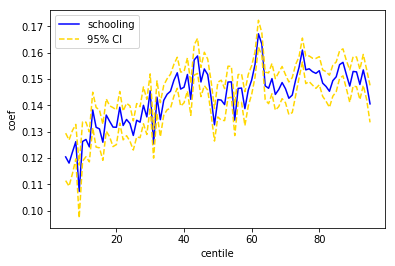

In [44]:
x=list(range(5, 96))
y=coef

pp.plot(x, y, color='blue', label='schooling')
pp.plot(x, low, linestyle='dashed', color='gold', label='95% CI')
pp.plot(x,upp, linestyle='dashed', color='gold')
pp.xlabel('centile')
pp.ylabel('coef')
pp.legend()
pp.show()